# "Challenge #1"
    MADS-ML
    Jannik Paul

In [1]:
# standards
import pandas as pd
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# graphics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exercise 1  
**1.1.**  
>Consider the following two parametrizations:  
>a) k = 1, Euclidean distance, distance-based voting  
>b) k = 1, Euclidean distance, uniform voting  
>What can be said about the relation between the accuracies of the two resulting classifiers on the test data? Explain your answer.  

With *uniform voting*, we do not consider the distance between new data points and their k-nearest neighbors, so the neighbors all equally influence the prediction.  
With *distance-based voting*, this is different: The further away a neighbor is, the more weight it loses for the prediction.  

Now if we just use one neighbor as in k=1 for the sample size, while remaining in the *same* distance metric like Euclidean based on sqrt(sum((x - y)^2)), of course the resulting accuracies in both distance-based voting and uniform voting will be the same.  
After all we are just watching one neighbor and not a multitude of neighbors, which then would have different fractional weights amongst themselves for the prediction, one neighbor influencing the result more heavily than another.  

Hence with k=1 the neighbor will be weighted as 1 (100%) in both the uniform and distance-based approach.
If we however find the best k later, maybe via cross-validation, then the differences become apparent. The uniform voting in Euclidean distance then usually provides less accuracy the larger than 1 our k grows during our testing.





**1.2.**  
>Consider the following two parametrizations:  
>a) k = 1, Mahattan distance, distance-based voting  
>b) k = 2, Euclidean distance, uniform voting  
>What can be said about the relation between the accuracies of the two classifiers on the test data? Explain your answer.  

Here we are not just looking at the prediction accuracy of one vs two neighbors. We are also looking at a different *metric* used in a), Manhattan distance which is defined by sum(|x - y|), we is looking at the absolute distance between two points in the standard coordinate system. Hence the correlation of different features is not considered here.  

Since we are using k=1 for the Manhattan distance, we can really flip uniform or distance-based voting around without affecting the result, as we remain in the same metric and just look at one neighbor.  
For k=2 in Euclidean distance however, we do get a lower score than we would get with distance-based, but are now in a *multidimensional* space to begin with, measuring the absolute distance between various points there.  

However, we are comparing two different metrics here – *without having a certain dataset provided!*  

One set may react better to Manhattan than to Euclidean, and another dataset vice versa.  

If we had a dataset provided on which we could run the two different metrics, we could find out which one results in better accuracies, or even decide up ahead which metric could fit better, for example with Euclidean when different features exist but not strongly correlated. Without a fixed dataset however, a comparison here with claims to accuracies, which are influenced by a dataset itself, would hence be claims we should not make.


# Exercise 2  
**2.1.**  
>Describe the relation between Random Forests and Decision Trees (for classification). Among others, address the goal of the algorithms, learning process, feature selection during learning, test and training data, the split criterion.

The most obvious relation between Random Forests and Decision Trees for classification is that Random Forests are based on a multitude of Decision Trees.  

The Decision Trees’ goal is to solve regression and classification problems by creating a training model that can get used to predict a class or value of a target variable. However, Decision Trees tend to overfit to their training set, especially as the size of the tree gets larger, and Random Forests’ goal is to correct that by constructing a multitude of Decision Trees to then select the class put out by most Trees (in the case of classification problems, not regression).  

During the learning process of Decision Trees the original dataset is first preprocessed, then split into training and test data, then the former root data (full training data) gets continuously split binarily into nodes as subsets of the root (or further down the branch of the parent nodes), based on tests answered binarily on the data at hand. These subsets then get tested and also split again, until a category is met at the end of the tree (at the leaves) and no further test is done. This way the Decision Tree can learn the class of a subset of the analyzed dataset, on whose test data part the model is then later run on and evaluated. Random Forests do it similarly, but multiple times on random subsets, and then select the class for a given subset which have been most often selected by the multitude of Decision Trees working on the same problem.  

The Random Forest however does not simply repeat that. It takes the initial training and test split differently, as it copies (not cuts) random subsets of our original dataset repeatedly, which is a contrast to a split which cuts. This is called bootstrapping and secures that not every tree uses the same data. Random Forest then trains each tree individually by selecting a random subset of features for each bootstrapped subset – while building a forest of different trees with different branches and different roots – showing off their leaves.  

The initial feature selection and split strategy is done by employing methods such as the Gini Impurity, or Entropy- or Information Gain (which was covered in the exercise), with a simple tree up ahead in which we look at how well the features (let’s call them x) predict another selected feature (y), and run the data down the tree. We then quantify the impurity of the leaves per x to predict y for example here in the Gini Impurity and select the lowest averagely weighted impurity score. Now we know which feature x from x to select. We cannot cover all cases but in this example, a split criterion would be that nodes have become pure (hence impurity = 0, all data instances belong to the same class) or if there are no feature-based splits left (no more split attributes are available), so they end as leaves in our tree. We’ll look at them further in 2.2.


**2.2.**  
>Compare the Random Forest and the Decision Tree Classifier in *sklearn* by discussing the parameters *n_estimators*, *criterion*, and *max_depth*.

*n_estimators*
- The parameter controls the number of decision trees in the forest.  
- It is *only* applicable to the Random Forest, because just here we use a multitude of decision trees. *If* it existed in Decision Tree, it would equal 1.  

*criterion*
- This enables a function to measure the quality of a split and is used for splitting nodes of a decision tree. The *gini* criterion measures impurity and is less computationally expensive, while the *entropy* criterion considers information gain and obtains slightly better results.  
- Criterion gets applied for the nodes in *both* Decision Tree and Random Forest and defaults to gini, due to almost resulting in the same quality with much less performance required.

*max_depth*
- This defines the maximum depth of a tree, which refers to the maximum amount of steps from root node to furthest leaf node. If it is not defined, there will be no limit and the trees expand until all leaves are pure (boolean) or the threshold of min_samples_split is met within a node.  
- The max_depth parameter can be applied to *both* Decision Tree and Random Forest.

**2.3.**  
>Compare the two algorithms with respect to their application: Which are the immediate advantages and disadvantages of Random Forest *over* Decision Tree?  

*Advantages*:  
- One advantage of Random Forest over Decision Trees is that it reduces the risk of overfitting, because it is not using the same root data for every tree and is thus much less sensitive to the original training data.  

- Another advantage is that Random Forest produces less variance than Decision Tree, because it uses multiple trees to create multiple predictions which are then aggregated, instead of just going through a tree towards a single one.  

- Random Forest achieves better balanced accuracy on test data.  

- Random Forest can be used for classification and regression problems.  

- Random Forest allows to get the relative feature importance, which helps in selecting the most contributing features.  

*Disadvantages*:  
- An immediate disadvantage is that Random Forest is more computationally expensive than Decision Tree.  

- Another disadvantage is that Random Forest is more difficult and complex to implement.



# Exercise 3  
Data Acquisition

In [2]:
df = pd.read_csv('data/online_shoppers_intention.csv')
# Let's see the types and if there are any null values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

**3.1.**  
>How many numerical and how many categorial features does the dataset offer with respect to the above research question?  
>Note: Categorial features can be represented numerically, but still are categorial features!

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


First of all, we could explore the raw data and imagine what may be what, but what should never be skipped is to read the documentation from the authors themselves. All the information is in there in the attribute information.  

Among the columns we can't count our target Revenue, it is properly mentioned as useable as the class label.  

The **numerical features are mentioned to be 10**, and the categorial *would be 8* but we are looking at it in respect to the research question which is aiming at the class label, hence the **categorial features to use for this are 7**.

We could transform several of the categorial features into numbers, however they would remain categorial features.

**3.2.**  
>Describe and comment on the class distribution in the dataset.

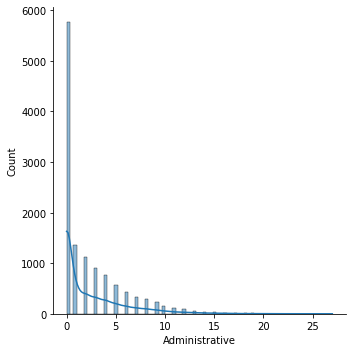

In [4]:
# Exploring a bit, looking at the first feature
sns.displot(data=df, x='Administrative', kde=True)

In [5]:
df.iloc[:,0:10].apply(np.mean)

Administrative                2.315166
Administrative_Duration      80.818611
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1194.746220
BounceRates                   0.022191
ExitRates                     0.043073
PageValues                    5.889258
SpecialDay                    0.061427
dtype: float64

We do not need to look far to suspect already that the numerical features could be unevenly distributed.

In [6]:
df.iloc[:,0:10].apply(np.max)

Administrative                27.000000
Administrative_Duration     3398.750000
Informational                 24.000000
Informational_Duration      2549.375000
ProductRelated               705.000000
ProductRelated_Duration    63973.522230
BounceRates                    0.200000
ExitRates                      0.200000
PageValues                   361.763742
SpecialDay                     1.000000
dtype: float64

Right away we see that the distribution is **unevenly scaled**, if we compare the largest here like 'ProductRelated_Duration' at **63974** to a tiny one like the first one 'Administrative' at just **27**!.

We also notice there are **a few high outliers in several features**, by seeing that the maxima are far away from the means.  

In [7]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Let's check out a categorial feature as well. Looking at the Dataset, 'VisitorType' offers itself for it. We see that most sales take from returning visitors.  

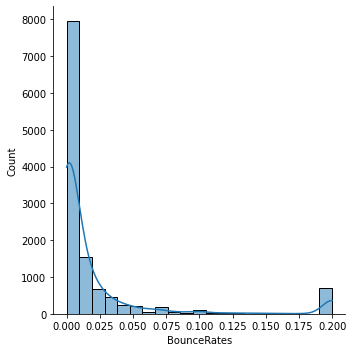

In [8]:
sns.displot(df['BounceRates'],kde=True, bins=21)

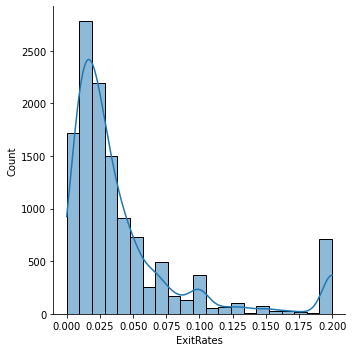

In [9]:
sns.displot(df['ExitRates'],kde=True, bins=21)


The BounceRates and ExitRates are already at a similar scale and by name alone indicate already that there's some connection. We take a look at if there *may* be any relation between them.

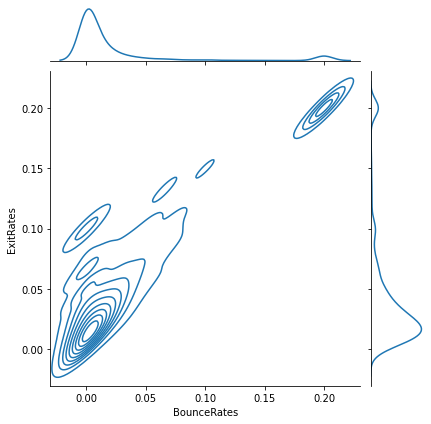

In [10]:
sns.jointplot(x='BounceRates',y='ExitRates',data=df, kind='kde')

So we see, some distributions *may* even be connected. Here there seems to be some gravitas beyond planet Pluto.

# Exercise 4  
**4.1.**  
>Restricting the data to the features: [list of features]

In [11]:
X = df.copy()

In [12]:
X.drop(['Month', 'VisitorType', 'Weekend', 'Revenue'], axis=1, inplace=True)

In [13]:
for col in X.columns:
    print(col)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
OperatingSystems
Browser
Region
TrafficType


First we copy the dataset into a new object X. As we will drop columns, we shall not forget to use .copy, or we'd just create a new variable. Operating on X would then refer to the same object and also drop columns in df! We also want to keep 'Revenue' available.



**4.2**.  
>Splitting the target attribute from the data.

In [14]:
y = df['Revenue'].astype(int)

In [15]:
X.shape, y.shape

((12330, 14), (12330,))

Good we kept df as an unaltered object.

**4.3.**  
>Selecting 30% of the data as test data.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42, stratify=y)

In [17]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8631, 14) (8631,) (3699, 14) (3699,)


**4.4.**  
>Create a function for adding configurations and results of an experiment to a dataframe.

In [18]:
configurations = []
evaluations = []
df_results = pd.DataFrame()

Create a dataframe with empty columns and two lists for storing the configurations and results.

In [19]:
def results_function(y_true, y_predict):
    b_accuracy = metrics.balanced_accuracy_score(y_true, y_predict)
    accuracy = metrics.accuracy_score(y_true, y_predict)
    return [b_accuracy, accuracy]

Defining the function to return the results, configurations will also be taken.

Note this is the basis for the functionality. *We do not know what we are dealing with at this stage*, so we add to the function in the following exercises.

# Exercise 5  
>Run experiments for learning and testing different parametrizations of Random Forest.
>1. Number of trees: 1, 10, or 100.  
>2. Maximum tree depth: 2, 3, 5, or 10.  

>In your experiments
>1. use the train-test-split from above,  
>2. use default parameters for all other than the above,  
>3. repeat each experiment 10 times using the seeds 1 through 10 to init Random Forest,
>4. add the results and configurations to the data frame using the method created above.

In [20]:
# Basic experimentation, visible direct output

# parameters
n_trees = 1
tree_depth = 2
seeds = 1

clf = RandomForestClassifier(n_estimators = n_trees, max_depth = tree_depth, random_state=seeds)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Configuration: n_estimator =", n_trees,", max_depth =", tree_depth, ", random_state =", seeds)
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# append balanced_accuracy and accuracy to evaluations list
# evaluations.append(results_function(y_test, y_pred))
#config = {"Configuration: n_estimator =", n_trees,", max_depth =", tree_depth, ", random_state =", seeds}
# config = {'n_estimator':n_trees, 'max_depth':tree_depth, 'random_state':seeds}
# configurations.append(config)


Configuration: n_estimator = 1 , max_depth = 2 , random_state = 1
Balanced Accuracy: 0.5
Accuracy: 0.8453636117869695


In [21]:
# Experimentation

# Uses train-test-split from above
# Uses default parameters for all other than the above
# Repeat 10 times using the seeds 1 through 10 to initialize Random Forest
# Add the results and configurations to the data frame

n_trees = [1,10,100]

for n_trees in n_trees:
    tree_depth = [2,3,5,10]
    for tree_depth in tree_depth:
        for seeds in range(1,11):
            clf = RandomForestClassifier(n_estimators = n_trees, max_depth = tree_depth, random_state=seeds)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            # append balanced_accuracy and accuracy to evaluations list
            evaluations.append(results_function(y_test, y_pred))

            config = {'n_estimator':n_trees, 'max_depth':tree_depth, 'random_state':seeds}
            configurations.append(config)
            df_configs = pd.DataFrame(configurations[1:], columns=configurations[0])
            df_evaluations = pd.DataFrame(evaluations[1:], columns=('balanced_accuracy', 'accuracy'))
            df_results = df_results.append(df_configs.join(df_evaluations), ignore_index=True)

In [22]:
df_results.head(1)

,n_estimator,max_depth,random_state,balanced_accuracy,accuracy
0,1,2,2,0.5,0.845364


# Exercise 6  
**6.1.**  
>Which parameter combination of the experiments yields the highest balanced accuracy (averaged over the 10 runs)?

In [23]:
df_results.groupby(['n_estimator', 'max_depth'], as_index=False)['balanced_accuracy'].mean()

,n_estimator,max_depth,balanced_accuracy
0,1,2,0.637139
1,1,3,0.665218
2,1,5,0.699864
3,1,10,0.708223
4,10,2,0.505613
5,10,3,0.574430
6,10,5,0.687065
7,10,10,0.736760
8,100,2,0.500000
9,100,3,0.531784


Showing to have taken the balanced accuracy over 10 runs.

In [24]:
df_results.groupby(['n_estimator', 'max_depth'], as_index=False)['balanced_accuracy'].mean().max()


n_estimator          100.000000
max_depth             10.000000
balanced_accuracy      0.741072
dtype: float64

The highest balanced accuracy (averaged over 10 runs) is achieved with 100 for number of trees and 10 for maximum tree depth. The score is 74.1072%.

**6.2.**  
>Create diagram (Note: Singular)

In [25]:
df_graph = df_results.groupby(['n_estimator', 'max_depth'], as_index=False)['balanced_accuracy'].agg(['mean','std']).reset_index()
df_graph.rename(columns = {'mean':'b_accuracy_mean','std':'b_accuracy_std'}, inplace = True)

>a) For each chosen number of trees, plot the balanced classification accuracy against the max-depth.  
>b) Use the different runs with different seeds to plot the respective average scores together with their standard deviation.

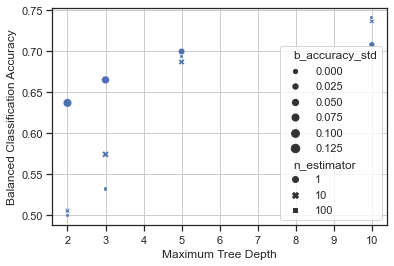

In [26]:
sns.set(style="ticks")
ax = sns.scatterplot(
    data=df_graph, x='max_depth', y='b_accuracy_mean', style='n_estimator', hue_norm=(0, 7), legend = "brief", size='b_accuracy_std'
    )
ax.set(xlabel="Maximum Tree Depth", ylabel="Balanced Classification Accuracy")
plt.grid()
plt.show()

**6.3.**  
>Interpret the diagram. In particular, comment on and explain the stability of the results for different parameter choices.  

The highest average balanced accuracy is reached with a (max) tree depth of 10.  
Each icon's style represents the number of trees (n_estimator).  
Each icon's size represents the standard deviation (b_accuracy_std).  

We can see that our best score is achieved when the model uses **100 trees** and a **max depth of 10**, as it also holds a **very stable (graphically small) standard deviation**.  

We also notice a few particular things:  
The brute force approach of training 100 trees is often very tight with a small deviation, but not always best. For the tree depth=5, training 100 trees is still very competitive, as the deviation is smaller than the *seemingly* more accurate single tree!  

However, with a maximum tree depth of 2, 3 the accuracy of a 100 tree forest is outmatched by single and tenner trees, even though the deviation is larger and hence indicates lower stability.

sns.set(style="ticks")
ax = sns.scatterplot(
    data=df_graph, x='max_depth', y='balanced_accuracy', style='n_estimator', hue_norm=(0, 7), legend = "full"
    )
ax.set(xlabel="Maximum Tree Depth", ylabel="Balanced Classification Accuracy")
plt.grid()
plt.show()

**6.4.**  
>Which further factor influences the evaluation, that is not addressed in the current setup? How would the setup have to be modified to include that as well?  

Fortuna may have played a role in the train-test split, especially as we are training a low number of trees as part of our experiments too. We remember that the Decision Tree Classifier as a single tree tends to overfit on its training data and then gives us worse results for the test evaluation. The lower the number of trees, the more our model suffers from this, so this does influence our evaluation.  

Another aspect may be the lack of scaling. If the data is unevenly distributed, has high cardinal features, or some features dominate others, then we get potentially worse results than we could if we employed scaling/oversampler.

# Exercise 7  
**7.1.**  
>For a Random Forest with 100 trees and a maximum depth of 14, create a bar chart showing the importance of each individual feature with regard to its contribution in random forest.  

In [27]:
configurations7 = []
evaluations7 = []
df_results7 = pd.DataFrame()

n_trees = 100
tree_depth = 14
seeds = 10

clf = RandomForestClassifier(n_estimators = n_trees, max_depth = tree_depth, random_state=seeds)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Configuration: n_estimator =", n_trees,", max_depth =", tree_depth, ", random_state =", seeds)
print("Balanced Accuracy:", metrics.balanced_accuracy_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

evaluations.append(results_function(y_test, y_pred))

config = {'n_estimator':n_trees, 'max_depth':tree_depth, 'random_state':seeds}
configurations.append(config)
df_configs7 = pd.DataFrame(configurations[1:], columns=configurations[0])
df_evaluations7 = pd.DataFrame(evaluations[1:], columns=('balanced_accuracy', 'accuracy'))
df_results7 = df_results7.append(df_configs7.join(df_evaluations7), ignore_index=True)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns.values)
#feature_imp.index = [column_headers]
feature_imp


Configuration: n_estimator = 100 , max_depth = 14 , random_state = 10
Balanced Accuracy: 0.747804482054562
Accuracy: 0.8924033522573669


Administrative             0.043786
Administrative_Duration    0.057015
Informational              0.017554
Informational_Duration     0.027944
ProductRelated             0.072421
ProductRelated_Duration    0.088081
BounceRates                0.055602
ExitRates                  0.094681
PageValues                 0.443762
SpecialDay                 0.005170
OperatingSystems           0.016524
Browser                    0.018507
Region                     0.028198
TrafficType                0.030757
dtype: float64

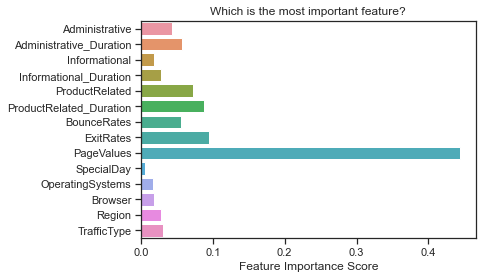

In [28]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.title("Which is the most important feature?")
plt.show()

**7.2.**  
>Which is the most important feature?  

The most important feature is PageValues with a score of 0.443762!

**7.3.**  
>Comment on the reliability of feature importance as implemented in *sklearn*'s Random Forest and propose an alternative.  
- Feature importances can be quickly calculated when based on mean decrease in impurity, but are not reliable for features of high cardinality, according to sklearn.  
- An alternative would be to scale to normalize the features properly beforehand.  
- A more robust approach is suggested by sklearn, which would be the more costly calculation of feature importance based on feature permutation. These do not gravitate towards high-cardinality features.